In [ ]:
# Atividade 1

# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [ ]:
# Carregando dados
try:
  df = pd.read_csv('../data/desafio_indicium_imdb.csv')
  df.head()
  print("Dados carregados com sucesso!")
except:
  print("Erro: Arquivo não encontrado.")

Dados carregados com sucesso!


In [ ]:
# Visualizando dados
print("Dimensão:", df.shape)

print("Informações gerais:")
df.info()

print("Estatísticas descritivas:")
df.describe(include="all").T

Dimensão: (999, 16)

 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,999.0,NaN,NaN,NaN,500.0,288.530761,1.0,250.5,500.0,749.5,999.0
Series_Title,999,998,Drishyam,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Released_Year,999,100,2014,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Certificate,898,16,U,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Runtime,999,140,130 min,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,999,202,Drama,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMDB_Rating,999.0,NaN,NaN,NaN,7.947948,0.27229,7.6,7.7,7.9,8.1,9.2
Overview,999,999,An organized crime dynasty's aging patriarch t...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Meta_score,842.0,NaN,NaN,NaN,77.969121,12.383257,28.0,70.0,79.0,87.0,100.0
Director,999,548,Alfred Hitchcock,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Limpando dados

# Convertendo Runtime para números
df["Runtime_min"] = pd.to_numeric(df["Runtime"].str.extract(r"(\d+)")[0], errors="coerce")

# Convertendo Gross para números
df["Gross_amt"] = pd.to_numeric(df["Gross"].astype(str).str.replace(",", ""), errors="coerce")

# Convertendo No_of_Votes para números
df["No_of_Votes_num"] = pd.to_numeric(df["No_of_Votes"].astype(str).str.replace(",", ""), errors="coerce")

# Convertendo Meta_score para números
df["Meta_score_num"] = pd.to_numeric(df["Meta_score"], errors="coerce")

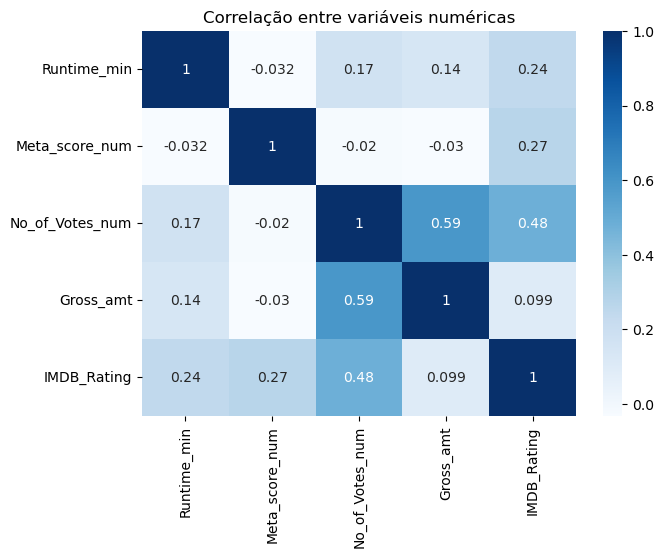

In [ ]:
# Correlacionando dados
num_cols = ["Runtime_min","Meta_score_num","No_of_Votes_num","Gross_amt","IMDB_Rating"]
plt.figure(figsize=(7,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlação entre variáveis numéricas")
plt.show()

# Minhas Hipóteses

1- Filmes com mais votos tendem a ter nota IMDB mais estável. <br>
2- Meta_score está correlacionado com IMDB. <br>
3- Faturamento alto nem sempre garante boa avaliação. <br>
4- O tempo de duração pode influenciar, mas não é o fator principal.

# Atividade 2

A- Qual filme você recomendaria para uma pessoa que você não conhece? <br>

Como tenho em mãos uma ferramenta que consegue analisar a classificação dos filmes por meio de notas IMDB e quantidade de votos, utilizaria uma filtragem simples: <br>
IMDB_Rating >= 8.0 e No_of_Votes >= 10.000 <br>
Assim garanto que não é só uma boa nota, mas também que bastante gente assistiu. <br>

B- Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
- Gênero, os filmes de ação e aventura tem um número maior de vendas em bilheterias.
- Número de votos, quanto mais pessoas assistirem, maior será o faturamento.
- Participação de atores e diretores famosos e/ou bem avaliados. <br>
Fora da tabela de dados, eu colocaria que os fatores de marketing e orçamento para a produção são muito importantes também. <br>

C- Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna? <br>

Sim, a partir do Overview (sinopse) é possível "adivinhar" de qual gênero o filme se trata, pois normalmente exitem palavras chaves, como por exemplo:
- Ação: action, mission, battle, police, agent.
- Terror: horror, dead, death, blood, evil.
- Drama: life, family, father, mother, love.
- Comédia: fun, comedy, party, friends. <br>
Não é uma análise 100% correta, mas pode ser um norteador para uma análise mais simples.

# Atividade 3

Explique como você faria a previsão da nota do IMDB a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por que? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por que?

Variáveis usadas: <br>
- Runtime_min <br>
- Meta_score_num <br>
- No_of_Votes <br>
- Gross_amt <br>
Utilizei essas variáveis por que são os dados númericos mais relacionados com as notas.

Problema: <br>
- O tipo de problema é uma regressão, pois é necessário prever um valor númerico e contínuo (nota).

Modelo: <br>
- Regressão linear, é uma maneira simples de interpretação.

Prós: <br>
- Rápido e fácil de interpretar.

Contras: <br>
- Não captura relações não lineares.

Métrica: <br>
- R² para ver quanta variação é explicada.
- RMSE para ver o erro médio da previsão.

In [ ]:
# Código da Atividade 3

# Prepararando dataset para modelagem
data = df[["Runtime_min","Meta_score_num","No_of_Votes_num","Gross_amt","IMDB_Rating"]].dropna()

X = data[["Runtime_min","Meta_score_num","No_of_Votes_num","Gross_amt"]]
y = data["IMDB_Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando modelo simples
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R2: 0.4998794103733938
RMSE: 0.20209366103682522


In [ ]:
# Salvando modelo 

joblib.dump(model, "modelo_imdb.pkl")

['modelo_imdb.pkl']

In [8]:
# Atividade 4

exemplo = {
    "Runtime_min": 142,
    "Meta_score_num": 80.0,
    "No_of_Votes_num": 2343110,
    "Gross_amt": 28341469
}

ex_df = pd.DataFrame([exemplo])
pred = model.predict(ex_df)

print("Nota IMDB prevista para Shawshank Redemption:", pred[0])

Nota IMDB prevista para Shawshank Redemption: 9.243182767235627
